# Generating Haikus From Images
- Pete Davis - pmd734
- Ram Kapistalam - rgk444
- India Lindsay - igl257
- Joseph (Alex) McGraw - jam27652
- Immanuel Ponminissery - ijp284
- Matthew Streichler - mrs4732

### Installing Libraries

In [1]:
pip install syllapy

     |████████████████████████████████| 194kB 3.3MB/s eta 0:00:01
  Created wheel for ujson: filename=ujson-1.35-cp37-cp37m-macosx_10_9_x86_64.whl size=21293 sha256=cd94a3cce0154f267233cc9f671f55c0bd6bd8e6bcc048786f3e3b9f36b7bd42
  Stored in directory: /Users/matthewstreichler/Library/Caches/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built ujson
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install transformers

     |████████████████████████████████| 1.9MB 6.7MB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 24.7MB/s eta 0:00:01
     |████████████████████████████████| 890kB 16.2MB/s eta 0:00:01
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=93a77c82331e2eb3ec9ccb8e050784ee0ae711759285e77a69c10761da5cd766
  Stored in directory: /Users/matthewstreichler/Library/Caches/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install random_word

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install nltk==3.5

     |████████████████████████████████| 1.4MB 5.2MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-cp37-none-any.whl size=1434674 sha256=84705bff8a62677d4b6909c874cc05be55b39bbc458fb6a975c7117407044e62
  Stored in directory: /Users/matthewstreichler/Library/Caches/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.4.5
    Uninstalling nltk-3.4.5:
      Successfully uninstalled nltk-3.4.5
Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /private/var/folders/rv/2k9t3n9j0d5bpgqw85xy6hm00000gn/T/pip-req-build-jjepmz_s
  Running command git clone -q https://github.com/openai/CLIP.git /private/var/folders/rv/2k9t3n9j0d5bpgqw85xy6hm00000gn/T/pip-req-build-jjepmz_s
  Created wheel for clip: filename=clip-1.0-cp37-none-any.whl size=1368688 sha256=6a17d0d7b4e8128a6b04837cf7a9d230541eca02fdaa1863d6de6f39a005d373
  Stored in directory: /private/var/folders/rv/2k9t3n9j0d5bpgqw85xy6hm00000gn/T/pip-ephem-wheel-cache-2ykii2la/wheels/79/51/d7/69f91d37121befe21d9c52332e04f592e17d1cabc7319b3e09
Successfully built clip


In [6]:
#libraries for importing images
import torchvision.models as models
import torchvision.transforms as transforms
import json
from PIL import Image
import torch
import transformers
from transformers import GPT2Tokenizer, GPT2Model, GPT2LMHeadModel

#libraries for generating poems
from transformers import pipeline, set_seed
import nltk
nltk.download("stopwords")
set_seed(42)
import random
import re
import syllapy
from nltk.corpus import stopwords
first_words = set(stopwords.words('english'))
first_words = list(first_words - set(("ain","am","an","and","aren","aren't","at","be","been","being","between","both","by","couldn","couldn't","d","doesn","doesn't","doing","don","don't","down","during","further","hadn","hadn't","hasn","hasn't","haven","haven't",\
                            "he","her","here","hers","herself","him","himself","i","isn","isn't","it","it's","its","itself","ll","m","ma","me","mightn","mightn't","mustn","mustn't","myself","needn","needn't","not","not","o","of","off","on","once",\
                            "or","other","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","shuld've","shouldn","shouldn't","t","than","that'll","theirs","them","themselves","there","these","they","those","through",\
                            "too","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","who","whom","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","yours","yourself","yourselves","didn","didn't","did","should've")))
from random_word import RandomWords
r = RandomWords()
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet



#libraries for using clip 
import pandas as pd
import numpy as np
import torch
import clip
from PIL import Image
from IPython.display import Image as im
import os
from torchvision.datasets import CIFAR100
from sklearn.linear_model import LogisticRegression
from torch.utils.data import DataLoader
from tqdm import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matthewstreichler/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/matthewstreichler/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### Uploading image as base content of haiku

In [7]:
img = Image.open('atx.jpeg').convert('RGB') #input image

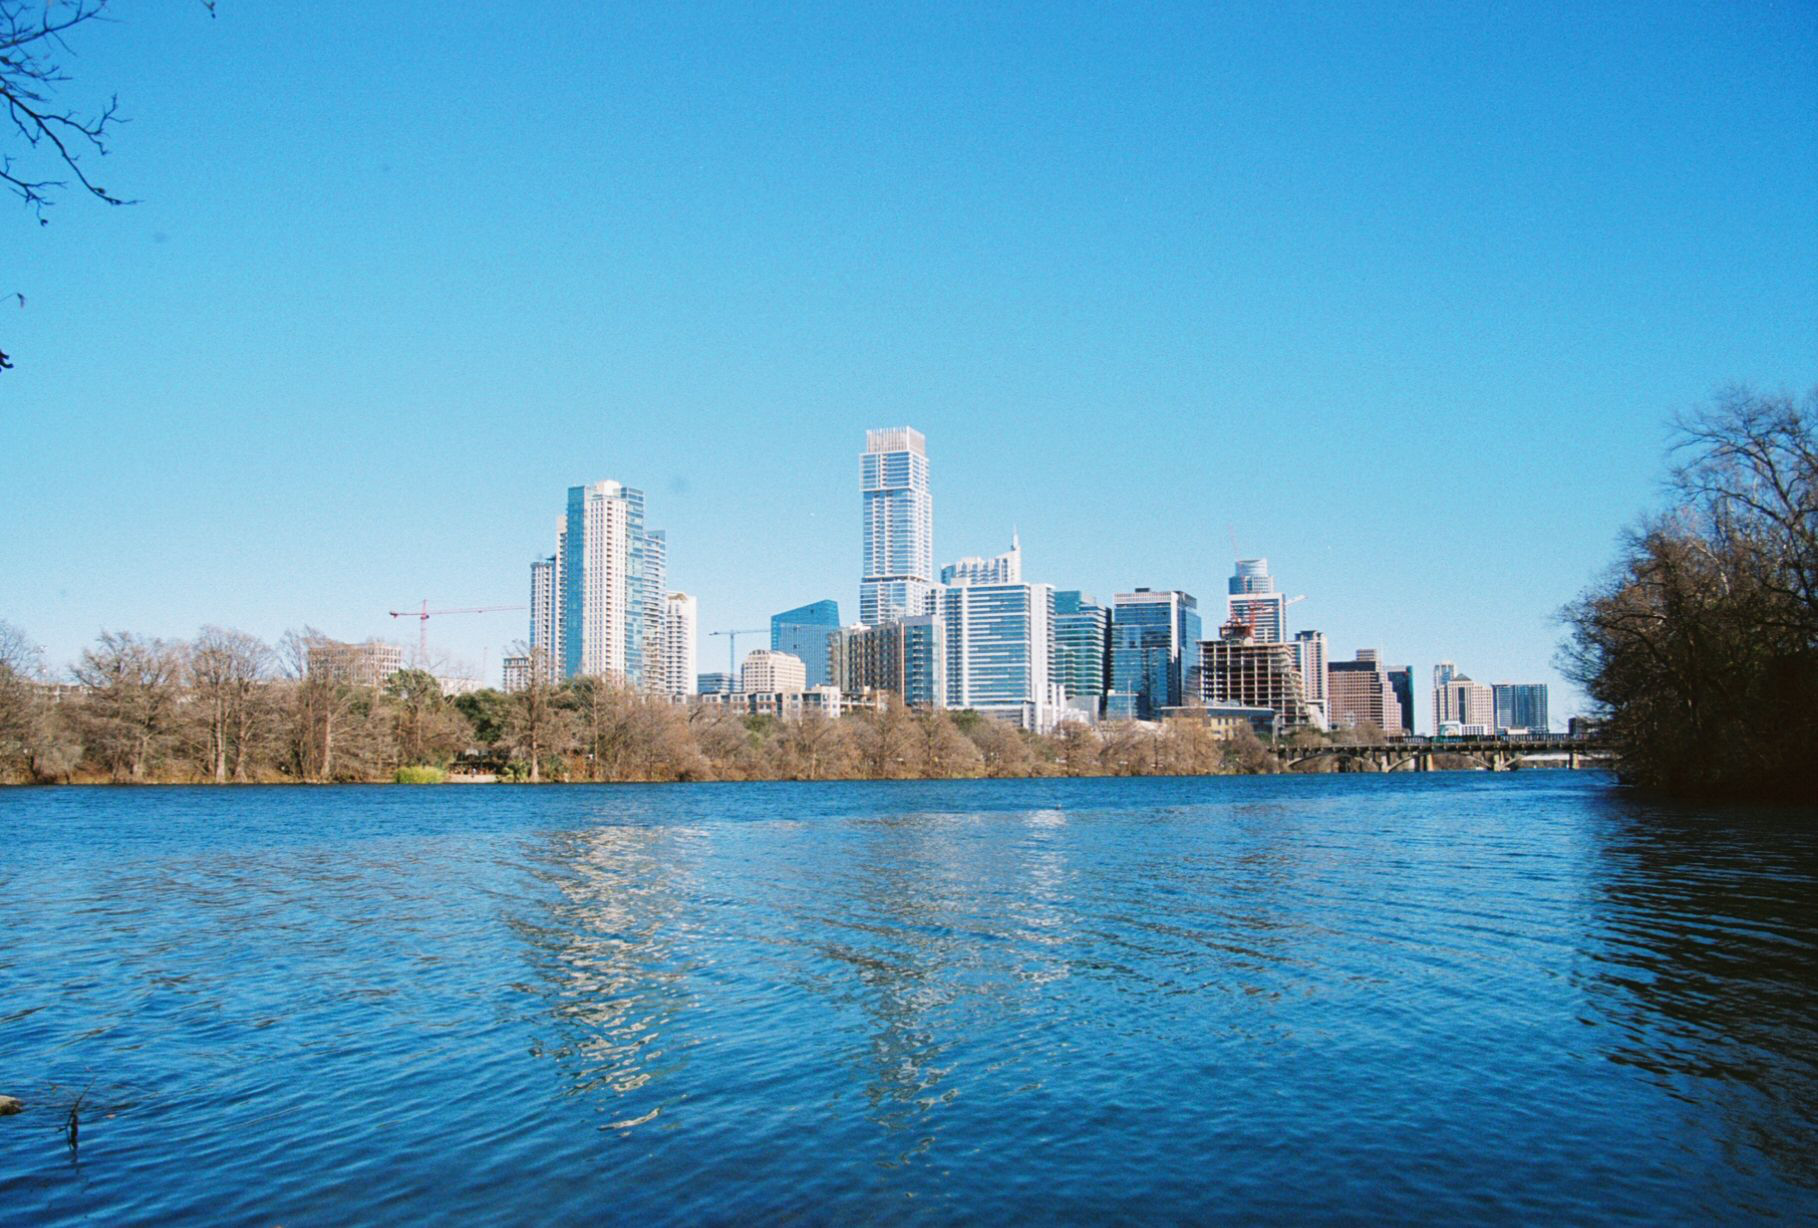

In [8]:
img

In [9]:
vgg16 = models.vgg16(pretrained = True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/matthewstreichler/.cache/torch/hub/checkpoints/vgg16-397923af.pth


In [10]:
transform = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224), transforms.ToTensor()])
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
img_2 = normalize(transform(img))
img_2 = img_2.unsqueeze(0)
prediction = vgg16(img_2)
prediction.data.numpy().argmax()

#download labels: 
labels = json.load(open('imagenet_class_index.json'))
input = labels[str(prediction.data.numpy().argmax())][1]
input = re.sub('_',' ',input)

In [11]:
labels

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

### Generating Haiku

In [17]:
def gen_story(beginning_line,sub_first=False):
    ''' given the first few words, will generate a dramatic sentence.
    If sub_first = True, will return the sentence not containing the begininning_lines fed it'''
    
    story_gen = pipeline('text-generation', model="pranavpsv/gpt2-genre-story-generator")
    beginning_line = "<BOS> <drama>" + ' ' + beginning_line
    results = story_gen(beginning_line)
    for text in results:
        output = str(text.values())[14:-3].lower()
        if sub_first == True:
            output = re.sub(beginning_line.lower(),'',output)
        output = re.sub( "<bos> <drama>",'',output)
        output = re.sub('[\n]','',output) #removing \n
        output = re.sub(r"[^\w\s']",' ',output) #removing other punctuation
        output = re.sub(r'[\d]','', output) #removing numbers
        output = re.sub(' +',' ',output) #removing double spaces
       
    return output

def syllable_counter(sentence,max,last_line = False):
    '''function takes original sentence and returns sentence with max specified number of syllables'''
    count = 0
    line= ''
    #counts syllables in sentence and adds word to line if syllable is less than max, if syllable = max, then breaks
    for word in sentence.split():
        new_count = syllapy.count(word)
        if count + new_count <= max:
            count += new_count
            line = line + word + ' '
     
        else:
            break
 
    #what does this do?
    nouns = {x.name().split('.', 1)[0] for x in wordnet.all_synsets('n')}
  
    #adding in "stop word" to increment syllable count by one if next word in actual sentence is more than one syllable
    if last_line == False: 
        while count < max:
            additional_words = ['life','need','heart']
            new_word = random.choice(additional_words)
            count += 1
            line += new_word
 

  
    else: #if last line = true, indicates we may need to end sentence with a noun if syllable count is short
  
        if count == (max - 2):
            #If we need 2 more syllabes, use the wordnet package to check for synonyms and antonyms for the last word that was over count. 
            synonyms = []
            antonyms = []
            confirmed = 0

            #This nested for loop creates lists of both synonyms and antonyms for the last word
            for syn in wordnet.synsets(word):
                for l in syn.lemmas():
                    synonyms.append(l.name())
                    if l.antonyms():
                        antonyms.append(l.antonyms()[0].name())
       
      
                #While loop first checks if there are any synonyms or antonyms for the final word that are under two syllables. If so, it ends the loop. 
                while confirmed == 0:
                    for i in synonyms:
                        if syllapy.count(i)==2 and i in nouns:
                            additional_noun = i
                            line += additional_noun
                            confirmed = confirmed+1
                            break
                    for i in antonyms:
                        if syllapy.count(i)==2 and i in nouns:
                            additional_noun = i
                            line += additional_noun
                            confirmed = confirmed+1
                            break

                    #After going through the synonyms and antonyms, it uses the random word package. It keeps generating nouns until there is one that meets the syllable requirement.
                    r = RandomWords()
                    b = r.get_random_word(hasDictionaryDef="true")
                    if syllapy.count(b)==2 and b in nouns:
                        additional_noun = b
                        line += additional_noun
                        confirmed = confirmed + 1
          

        elif count == (max - 3):

            synonyms = []
            antonyms = []
            confirmed = 0

            for syn in wordnet.synsets(word):
                for l in syn.lemmas():
                    synonyms.append(l.name())
                    if l.antonyms():
                        antonyms.append(l.antonyms()[0].name())
       
     
                while confirmed == 0:
                    for i in synonyms:
                        if syllapy.count(i)==3 and i in nouns:
                            additional_noun = i
                            line += additional_noun
                            confirmed = confirmed+1
                            break
                    for i in antonyms:
                        if syllapy.count(i)==3 and i in nouns:
                            additional_noun = i
                            line += additional_noun
                            confirmed = confirmed+1
                            break
                    r = RandomWords()
                    b = r.get_random_word(hasDictionaryDef="true", includePartOfSpeech="noun")
                    if syllapy.count(b)==3 and b in nouns:
                        additional_noun = b
                        line += additional_noun
                        confirmed = confirmed + 1
     
  
        elif count == (max - 1):
        
            synonyms = []
            antonyms = []
            confirmed = 0

            for syn in wordnet.synsets(word):
                for l in syn.lemmas():
                    synonyms.append(l.name())
                    if l.antonyms():
                        antonyms.append(l.antonyms()[0].name())
       
                #additional_noun = 'problem'
                while confirmed == 0:
                    for i in synonyms:
                        if syllapy.count(i)==1 and i in nouns:
                            additional_noun = i
                            line += additional_noun
                            confirmed = confirmed+1
                            break
                    for i in antonyms:
                        if syllapy.count(i)==1 and i in nouns:
                            additional_noun = i
                            line += additional_noun
                            confirmed = confirmed+1
                            break
                    r = RandomWords()
                    b = r.get_random_word(hasDictionaryDef="true", includePartOfSpeech="noun")
                    if syllapy.count(b)==1 and b in nouns:
                        additional_noun = b
                        line += additional_noun
                        confirmed = confirmed + 1

  
    return line

def gen_poem2(label):
    poem = []
    label = re.sub('_',' ',label)
    first_word = random.choice(first_words) + ' ' + label
    sentence = gen_story(first_word, False)

    first_line = syllable_counter(sentence,5)

    poem.append(first_line)

    second_line = gen_story(first_line, True)

    second_line = syllable_counter(second_line,7)
    poem.append(second_line)
  
    total = first_line + ' ' + second_line
    third_line = gen_story(total, True)
    third_line = syllable_counter(third_line,5,last_line = True)
    poem.append(third_line)

    haiku = ''
    for i in poem:
        haiku += i 
        #haiku = haiku[:-1]
  

    return haiku

In [18]:
list_haikus = []
for i in range(10):
    haiku = gen_poem2(input)
    list_haikus.append(haiku)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Retry, exception: 


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

### Connecting with CLIP

In [19]:
list_haikus

['only breakwater the story unfolds in three vernacular xa ',
 'a breakwater town young tom likes to hang out on the riverboat ',
 'above breakwater back to top of the pines following the tauon',
 'more breakwater towns after a robbery in vernacular they ',
 'with breakwater on vernacular there is great vernacular of ',
 'most breakwater in vernacular the film lifeis set in the timbre',
 'are breakwater jobs a young woman gets hired she is being step',
 'more breakwater lifescenes story of a village by satyajit ray ',
 'our breakwater and vernacular we find our vernacular now ',
 'more breakwater from ichanga and ichanga the story begins ']

In [20]:
# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

# Prepare the inputs
image = img
image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in list_haikus]).to(device)


# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

# Pick the most similar label for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(1)

# Print the result
print("\nTop prediction:\n")
for value, index in zip(values, indices):
    print(f"{list_haikus[index]}: {100 * value.item():.2f}%")
    label = list_haikus[index]
    percent = value.item()


Top prediction:

with breakwater on vernacular there is great vernacular of : 23.27%
